# Question ONE:
## 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [3]:
# Importing requests to extract content from a url
import requests   
# Beautifulsoup is for web scrapping...used to scrap specific content 
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob 
import pandas as pd
import spacy
import numpy as np

from matplotlib.pyplot import imread

%matplotlib inline
import string
import pandas



In [12]:
!pip install textblob

In [4]:
elon = pd.read_csv("Elon_musk (1).csv",error_bad_lines=False,index_col=0)

In [5]:
elon

,Text
1,@kunalb11 I�m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
def clean_text(elon):
  elon = re.sub('@[A-Za-z0–9]+', '', elon) #Removing tag(@)
  elon = re.sub('#', '', elon) # Removing hashtag(#)
  elon = re.sub('RT[\s]+', '', elon) # Removing RT
  elon = re.sub('https?:\/\/\S+', '', elon) # Removing links
  return elon
 
elon.Text = elon.Text.apply(clean_text)

In [7]:
elon

,Text
1,11 I�m an alien
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
3,Great interview!
4,27 Doge is underestimated
5,Congratulations Tesla China for amazing execu...
...,...
1995,"True, it sounds so surreal, but the negative ..."
1996,Make sure to read ur terms &amp; conditions b...
1997,Samwise Gamgee
1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [126]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-09-23 18:16:28.263306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-23 18:16:28.263884: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:10]

['11 I�m an alien',
 '_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 '27 Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 '_  10 Haha thanks :)',
 '10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [9]:
# Joining the list into one string/text
text = ' '.join(elon)
text

'11 I�m an alien _AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! 27 Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. _  10 Haha thanks :) 10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923><U+0001F923> This is true power haha Any crypto wallet that won�t give you your private keys should be avoided at all costs Your app sucks : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! Yes 3  _ Once we can pre

In [10]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'11 I�m an alien AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview 27 Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge\nAll thought he would fail\nHimself most of all   10 Haha thanks  10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923U0001F923 This is true power haha Any crypto wallet that won�t give you your private keys should be avoided at all costs Your app sucks  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes 3   Once we can predict cash flow reasonably well

In [11]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['11', 'I�m', 'an', 'alien', 'AACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', '27', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All']


In [12]:
len(text_tokens)

17765

In [13]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['11', 'I�m', 'alien', 'AACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', '27', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', '10', 'Haha', 'thanks']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Purva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Purva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['11', 'i�m', 'alien', 'aacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', '27', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['11', 'i�m', 'alien', 'aacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', '27', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', '10', 'haha', 'thank']


In [16]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = elon[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

F:\NUKSHA\Python_Anaconda\lib\site-packages\spacy\displacy\__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [17]:
one_block

'Great interview!'

In [18]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Great ADJ
interview NOUN
! PUNCT


In [19]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

[]


In [20]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,interview,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

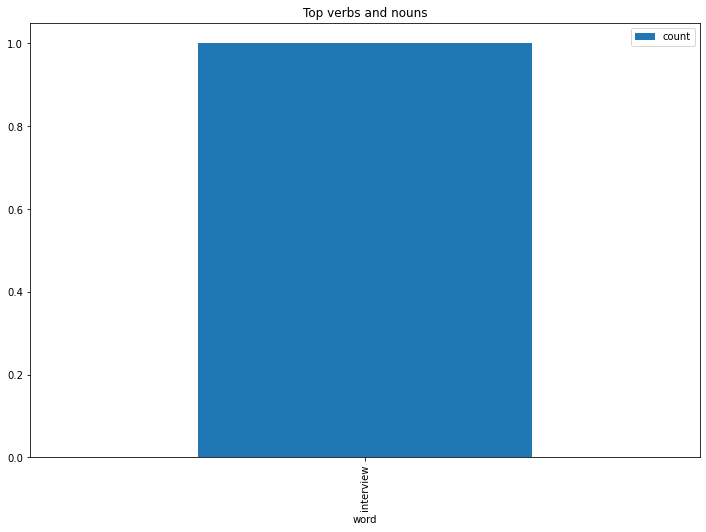

In [21]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [22]:
def get_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [23]:
a = 'I�m an alien'

get_sentiment(a)

'negative'

## Vader Lexicon

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Purva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
sia = SentimentIntensityAnalyzer()
a = 'I�m an alien'
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [27]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [28]:
get_vader_sentiment(a)

'neutral'

## Rule Based Approach

In [29]:
# Reading reviews from a text file 
with open("Elon_musk (1).csv","r") as input:
    elon_reviews = input.read()
type(elon_reviews)   
#iphone_reviews

str

In [30]:
# Joinining all the reviews into single paragraph 
#ip_rev_string = " ".join(iphone_reviews)
ip_rev_string = elon_reviews
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)


# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [31]:
## Example
ip_rev_string

' text kunalb alien id aa carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox https co wfkmyu oj frodo underdoge thought would fail https co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely represent real world time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest https co rwe uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u f u f true power haha https co fc uhqsd freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission https co pwt ajtourville yes blkmdl rationaletienne adamklot

In [55]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

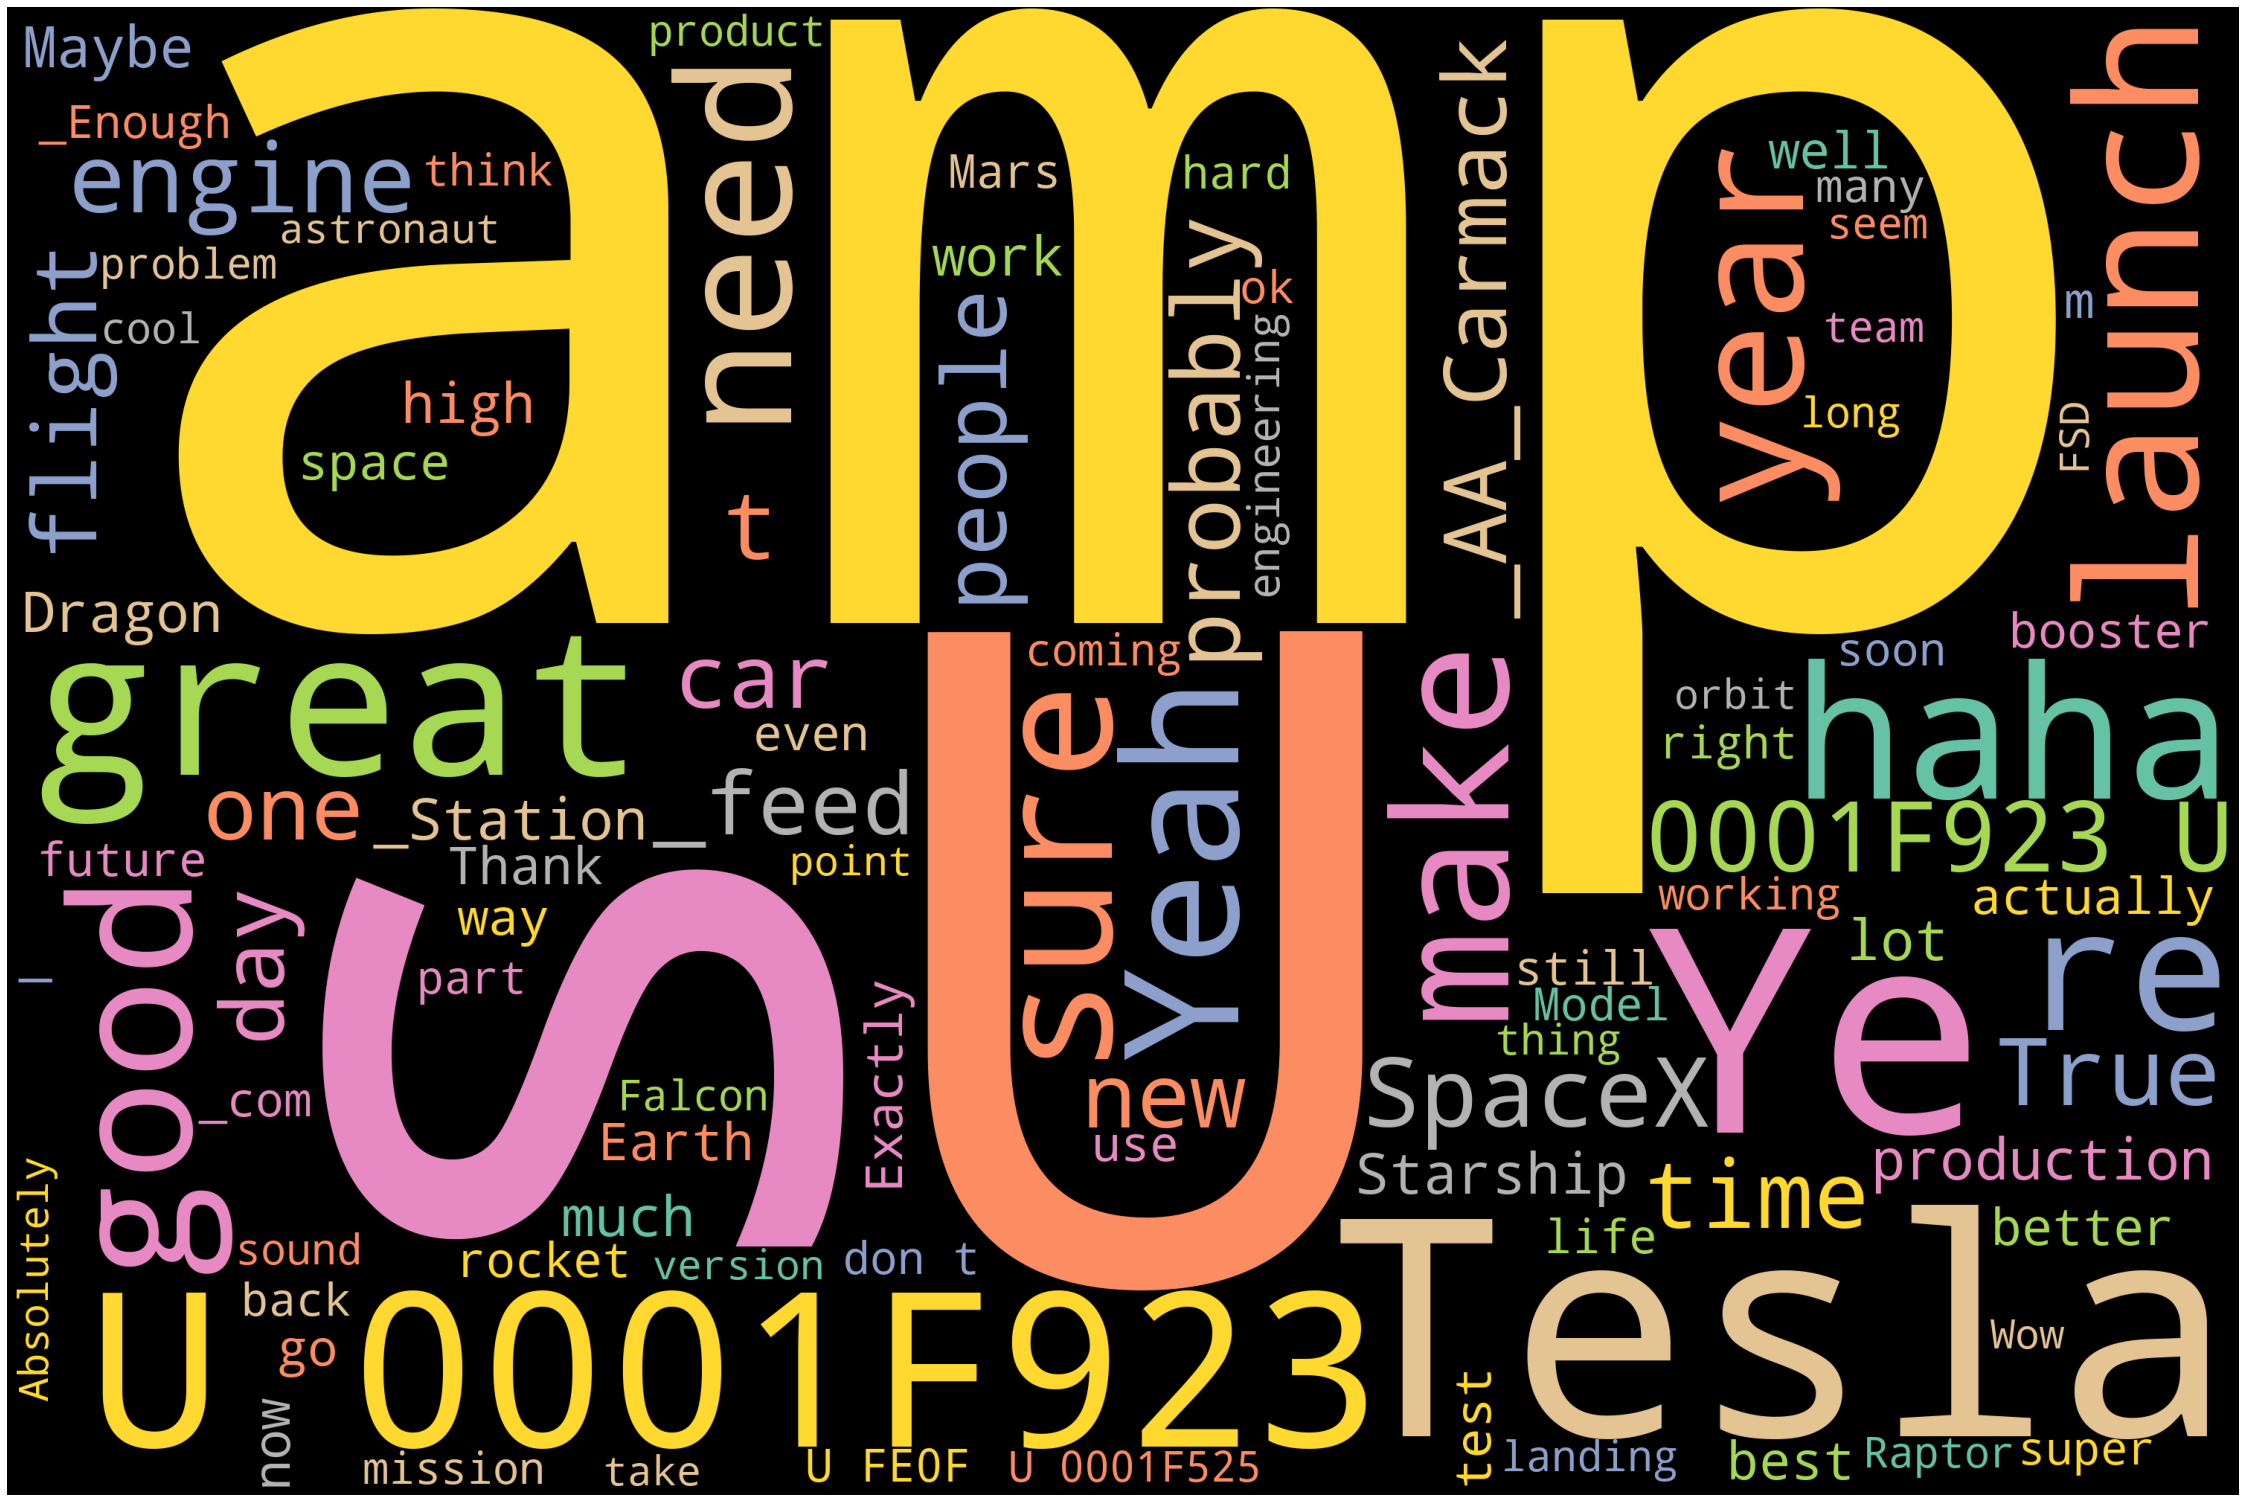

In [56]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

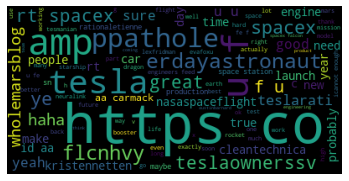

In [32]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [33]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


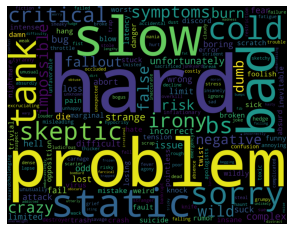

In [34]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

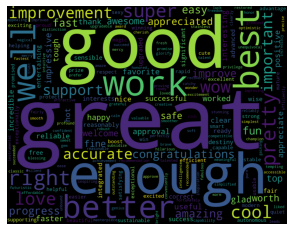

In [35]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [36]:
len(ip_pos_in_pos)

6295

In [37]:
len(ip_neg_in_neg)

3094

In [38]:
len(ip_reviews_words)

17262

In [39]:
6295/17262

0.36467385007530995

In [40]:
3094/17262

0.1792376317923763

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(elon)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f495', '0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '10', '11742', '13031925', '15', '20', '2192', '247', '28delayslater', '305', '45', '60', '74', '85', '_aa_carmack', '_bass3d', '_bickett', '_com', '_doug', '_enough', '_feed', '_lab', '_nafnlaus', '_ryan', '_sci', '_skeptic', '_stanley', '_station', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'air', 'all', 'almost', 'already', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'are', 'around', 'as', 'astronauts', 'at', 'at tesla', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'battery', 'be', 'be great', 'because', 'been', 'before', 'being', 'berlin', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'body', 'booster', 'both', 'build', 'but', 'but it', 'but we', 'by', 'can', 'can be', 'car', 'cargo', 'cars', 'close', 'cold', 'come', 'coming', 'coming soon', 'companies', 'completed', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'course', 'crew', 'crew

## Sentimental Analysis

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [43]:

df = pd.read_csv('Elon_musk (1).csv',index_col=0)
df.head()

,Text
1,@kunalb11 I�m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [44]:
df['Text'].value_counts()

@westcoastbill Indeed                                                                                                                           2
The most entertaining outcome is the most likely                                                                                                2
@slashdot https://t.co/WoIwia7zTn                                                                                                               1
@TheOnion It was a beast compared to the VIC-20                                                                                                 1
@Sneakyness One of the all time best                                                                                                            1
                                                                                                                                               ..
@raytech247 @WholeMarsBlog The Model 3 production ramp was sheer agony for two years, but that was do or die for Te� https:/

In [45]:
sid.polarity_scores(df.loc[1]['Text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [46]:
df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Text,scores
1,@kunalb11 I�m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp..."
4,@gtera27 Doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
5,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp..."


In [47]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Text,scores,compound
1,@kunalb11 I�m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588
4,@gtera27 Doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732
5,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513


In [48]:
df['scores'][5]['compound']

0.8513

In [49]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [50]:
df.head()

,Text,scores,compound,comp_score
1,@kunalb11 I�m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588,pos
4,@gtera27 Doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732,neg
5,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513,pos


In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
accuracy_score(df['Text'],df['comp_score'])

0.0

In [53]:
print(classification_report(df['Text'],df['comp_score']))

                                                                                                                                                                                                 precision    recall  f1-score   support

                                                                                                                                             .@TheBabylonBee is savage <U+0001F923><U+0001F923>       0.00      0.00      0.00       1.0
                                                                                                                     0 to 155mph trap speed in a 1/4 mile. 200mph top speed (with right tires).       0.00      0.00      0.00       1.0
                                                                                                                                                                                            100       0.00      0.00      0.00       1.0
                                                                   

F:\NUKSHA\Python_Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\NUKSHA\Python_Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\NUKSHA\Python_Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\NUKSHA\Python_Anaconda\lib\site-packages\sklearn\metrics\

In [54]:
print(confusion_matrix(df['Text'],df['comp_score']))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Question 2
## 1) Extract reviews of any product from ecommerce website like amazon
## 2) Perform emotion mining



In [91]:
elon_reviews=[5]

In [92]:
### Extracting reviews from Amazon website ################
for i in range(1,10):
  ip=[]  
  url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
  elon_reviews=elon_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews


In [97]:
# writng reviews in a text file 
with open("Elon_musk.csv","w") as output:
    output.write(str(elon_reviews))

In [96]:
elon_reviews

[5]

## Emotion mining
## Vader Lexicon

In [57]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Purva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [59]:
sia = SentimentIntensityAnalyzer()
a = 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!'
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.8513}

In [60]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [61]:
get_vader_sentiment(a)

'positive'